In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [73]:
from xiaodetector import Classifier
from skimage.feature import hog

In [74]:
pix_per_cell = 8

    
orient = 9

        
cell_per_block = 2

In [75]:
def color_hist_features(img, nbins=32, bins_range=(0, 256)):
        
        # Compute the histogram of the color channels separately
        channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
        
        channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
        
        channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
        
        # Concatenate the histograms into a single feature vector
        hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
        
        # Return the individual histograms, bin_centers and feature vector
        return hist_features

In [79]:
def get_hog_features(img, feature_vec=True):

        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=False, feature_vector=feature_vec)

        return features

In [80]:
feature_image = cv2.imread(classifier.load_vehicle_images()[0])

In [81]:
hist_features = color_hist_features(feature_image, nbins=32)

ch1 = feature_image[:,:,0]

ch2 = feature_image[:,:,1]

ch3 = feature_image[:,:,2]


hog1 = get_hog_features(ch1, feature_vec=False).ravel()


hog2 = get_hog_features(ch2, feature_vec=False).ravel()


hog3 = get_hog_features(ch3, feature_vec=False).ravel()


hog_features = np.hstack((hog1, hog2, hog3))

In [89]:
y = np.concatenate((hog_features[0:len(hist_features)], hist_features))

In [121]:
Y = ['#00C7F3']*(len(hist_features)//2)

Y.extend(['#893045']*(len(hist_features)//2))

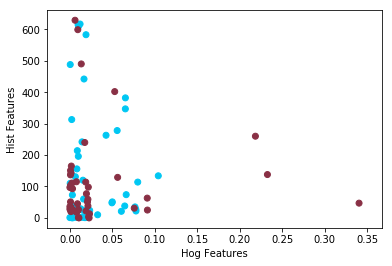

In [122]:
plt.scatter(hog_features[0:len(hist_features)], hist_features, c = np.array(Y), cmap=plt.cm.Paired)
plt.xlabel('Hog Features')
plt.ylabel('Hist Features')


In [135]:
classifier = Classifier()

vehicle_image = cv2.imread(classifier.load_vehicle_images()[0])

non_vehicle_image = cv2.imread(classifier.load_non_vehicle_images()[0])

# vehicle_features = classifier.extact_image_features(vehicle_image)

# non_vehicle_features = classifier.extact_image_features(non_vehicle_image)

In [137]:
hist_features = color_hist_features(feature_image, nbins=32)

ch1 = vehicle_image[:,:,0]

ch2 = vehicle_image[:,:,1]

ch3 = vehicle_image[:,:,2]


hog1 = get_hog_features(ch1, feature_vec=False).ravel()


hog2 = get_hog_features(ch2, feature_vec=False).ravel()


hog3 = get_hog_features(ch3, feature_vec=False).ravel()


vehicle_hog_features = np.hstack((hog1, hog2, hog3))

In [138]:
hist_features = color_hist_features(feature_image, nbins=32)

ch1 = non_vehicle_image[:,:,0]

ch2 = non_vehicle_image[:,:,1]

ch3 = non_vehicle_image[:,:,2]


hog1 = get_hog_features(ch1, feature_vec=False).ravel()


hog2 = get_hog_features(ch2, feature_vec=False).ravel()


hog3 = get_hog_features(ch3, feature_vec=False).ravel()


non_vehicle_hog_features = np.hstack((hog1, hog2, hog3))

In [139]:
Y = ['#00C7F3']*(len(vehicle_hog_features)//2)

Y.extend(['#893045']*(len(vehicle_hog_features)//2))

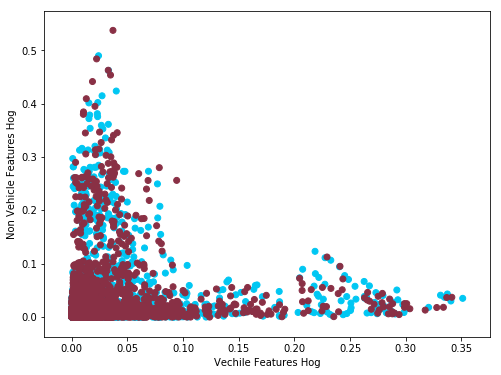

In [140]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Y = Y.reshape((-1, 2))
# Y = [1]*len(vehicle_features)

# Y.extend([0]*len(non_vehicle_features))

# Y = np.array(Y)

# print(Y.shape, )
# # # Plot the training points
plt.scatter(vehicle_hog_features, non_vehicle_hog_features, c=Y, cmap=plt.cm.Paired)
plt.xlabel('Vechile Features Hog')
plt.ylabel('Non Vehicle Features Hog')


In [57]:
print(len(vehicle_features))

8460


ValueError: Invalid RGBA argument: 1

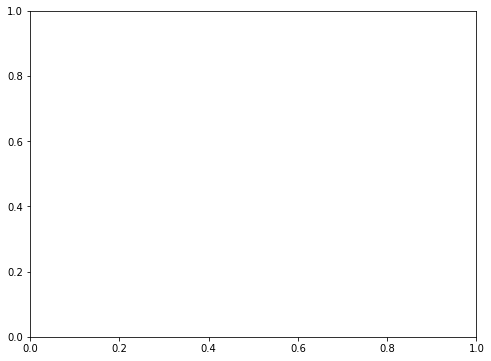

In [58]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

([], <a list of 0 Text yticklabel objects>)

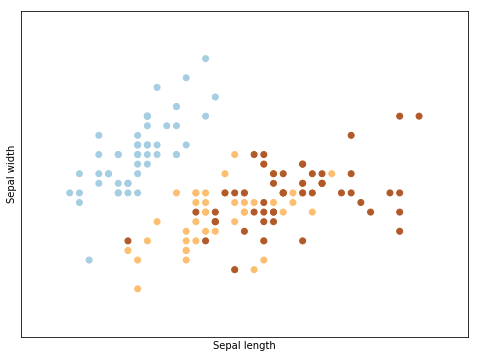

In [97]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# print(X.shape)

# print(Y.shape)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
# plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [98]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
